### Portfolio assignment 10
15 min: Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you chose in portfolio assignment 4. Does the correlation and scatter plot match your expectations? Add your answer to your notebook. Commit the Notebook to your portfolio when you're finished. 

In [5]:
import pandas as pd

In [6]:
hospital = pd.read_csv("hospital.csv", sep=";")
# hospital = hospital.groupby(["Date_of_statistics", "Security_region_code"])
hospital = hospital.drop(columns=["Version", "Date_of_report"])

covid = pd.read_csv("covid-positive.csv", sep=";")
# tests = tests.groupby(["Date_of_statistics", "Security_region_code"])
covid = covid.drop(columns=["Version", "Date_of_report"])

hospital.head()

,Date_of_statistics,Municipality_code,Municipality_name,Security_region_code,Security_region_name,Hospital_admission_notification,Hospital_admission
0,2020-02-27,GM0014,Groningen,VR01,Groningen,0,0
1,2020-02-27,GM0034,Almere,VR25,Flevoland,0,0
2,2020-02-27,GM0037,Stadskanaal,VR01,Groningen,0,0
3,2020-02-27,GM0047,Veendam,VR01,Groningen,0,0
4,2020-02-27,GM0050,Zeewolde,VR25,Flevoland,0,0


In [7]:
covid.head()

,Date_of_statistics,Security_region_code,Security_region_name,Tested_with_result,Tested_positive
0,2020-06-01,VR01,Groningen,3,0
1,2020-06-02,VR01,Groningen,207,0
2,2020-06-03,VR01,Groningen,207,0
3,2020-06-04,VR01,Groningen,241,1
4,2020-06-05,VR01,Groningen,224,0


In [8]:
df = pd.merge(hospital, covid, on=["Date_of_statistics", "Security_region_code"])
df = df.groupby(["Date_of_statistics", "Security_region_name_x"]).sum()
df.head(100)

Hospital_admission_notification  \
Date_of_statistics Security_region_name_x                                    
2020-06-01         Amsterdam-Amstelland                                  1   
                   Brabant-Noord                                         0   
                   Brabant-Zuidoost                                      0   
                   Drenthe                                               1   
                   Flevoland                                             0   
...                                                                    ...   
2020-06-04         Twente                                                1   
                   Utrecht                                               1   
                   Zaanstreek-Waterland                                  0   
                   Zeeland                                               0   
                   Zuid-Holland-Zuid                                     0   

                                           Hospital_admission  \
Date_of_statistics Security_region_name_x                       
2020-06-01         Amsterdam-Amstelland                     0   
                   Brabant-Noord                            0   
                   Brabant-Zuidoost                         1   
                   Drenthe                                  0   
                   Flevoland                                0   
...                                                       ...   
2020-06-04         Twente                                   0   
                   Utrecht                                  2   
                   Zaanstreek-Waterland                     0   
                   Zeeland                                  0   
                   Zuid-Holland-Zuid                        0   

                                           Tested_with_result  Tested_positive  
Date_of_statistics Security_region_name_x                                       
2020-06-01         Amsterdam-Amstelland                   168                6  
                   Brabant-Noord                          429                0  
                   Brabant-Zuidoost                       882               42  
                   Drenthe                                672                0  
                   Flevoland                               90               24  
...                                                       ...              ...  
2020-06-04         Twente                                2842               42  
                   Utrecht                              23478              442  
                   Zaanstreek-Waterland                  1456                7  
                   Zeeland                               1456               13  
                   Zuid-Holland-Zuid                     2910               50  

[100 rows x 4 columns]

In [9]:
df.corr()

,Hospital_admission_notification,Hospital_admission,Tested_with_result,Tested_positive
Hospital_admission_notification,1.000000,0.701725,0.446119,0.523044
Hospital_admission,0.701725,1.000000,0.556403,0.664087
Tested_with_result,0.446119,0.556403,1.000000,0.897699
Tested_positive,0.523044,0.664087,0.897699,1.000000


C:\Users\Jens\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Hospital_admission', ylabel='Tested_positive'>

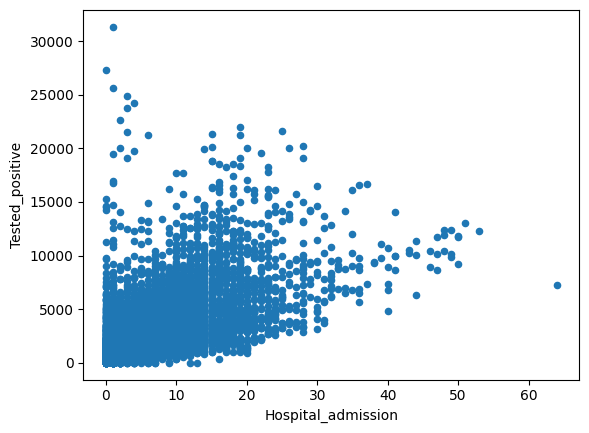

In [10]:
df.plot(kind="scatter", x="Hospital_admission", y="Tested_positive")

Het grootste gedeelte van de mensen die positief waren getest moesten uiteindelijk niet naar het ziekenhuis. Wel zaten er uitzonderingen bij. Dus relatief gezien moesten er weinig mensen naar het ziekenhuis als ze positief getest waren.